# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key
response =  requests.get(url)
print(f"Status Code: {response.status_code}")

print(response.text)


Status Code: 400
{"cod":"400","message":"Nothing to geocode"}


In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]

        city_lng = city_weather["coord"]["lon"]
 
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
       
        city_clouds = city_weather["clouds"]["all"]
       
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
    
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pokaran
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | pechora
Processing Record 8 of Set 1 | yuzhno-kurilsk
Processing Record 9 of Set 1 | valjevo
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | stavern
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | vargashi
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | pavlodar
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | san

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pokaran,26.9167,71.9167,18.35,30,100,4.83,IN,1707245721
1,yellowknife,62.4560,-114.3525,-19.21,90,100,5.14,CA,1707245711
2,waitangi,-43.9535,-176.5597,17.68,93,100,2.68,NZ,1707245457
3,blackmans bay,-43.0167,147.3167,13.07,80,94,1.60,AU,1707245723
4,bethel,41.3712,-73.4140,5.11,50,0,2.57,US,1707245724


In [8]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pokaran,26.9167,71.9167,18.35,30,100,4.83,IN,1707245721
1,yellowknife,62.4560,-114.3525,-19.21,90,100,5.14,CA,1707245711
2,waitangi,-43.9535,-176.5597,17.68,93,100,2.68,NZ,1707245457
3,blackmans bay,-43.0167,147.3167,13.07,80,94,1.60,AU,1707245723
4,bethel,41.3712,-73.4140,5.11,50,0,2.57,US,1707245724


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

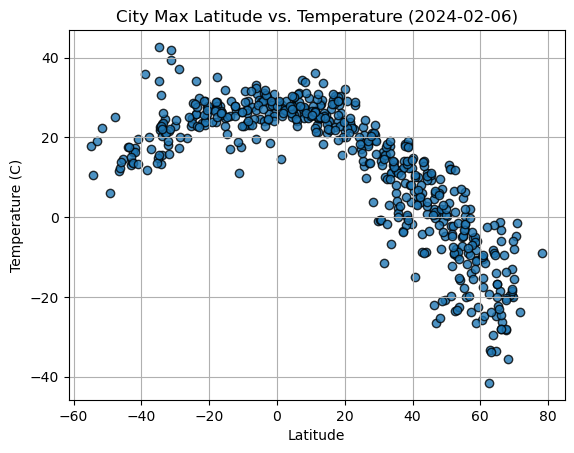

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],marker="o",edgecolors="black",linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

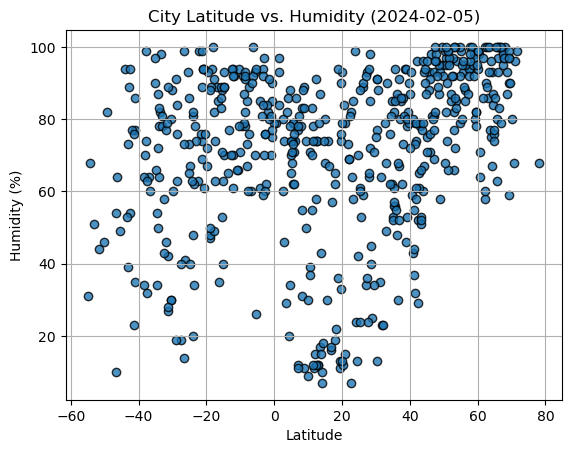

In [16]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],marker="o",edgecolors="black",linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

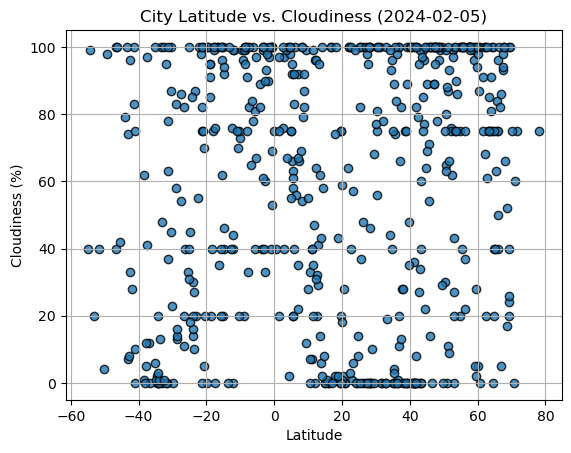

In [17]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],marker="o",edgecolors="black",linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

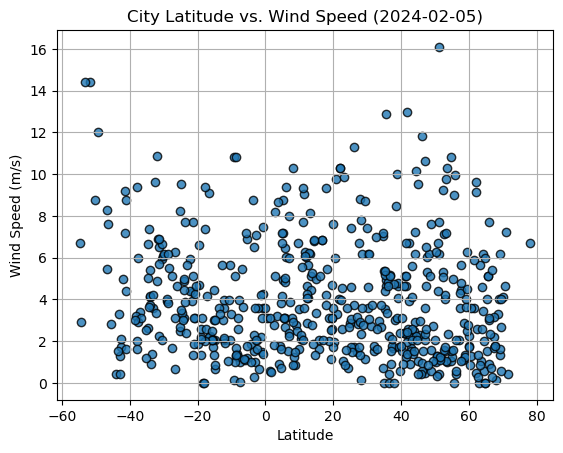

In [18]:
# Build scatter plot for latitude vs. wind speed plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],marker="o",edgecolors="black",linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values*slope + intercept
    line_y = "y =" +str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values,regression_values)
    plt.annotate(line_y, text_coord, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pokaran,26.9167,71.9167,18.35,30,100,4.83,IN,1707245721
1,yellowknife,62.4560,-114.3525,-19.21,90,100,5.14,CA,1707245711
4,bethel,41.3712,-73.4140,5.11,50,0,2.57,US,1707245724
6,pechora,65.1472,57.2244,-22.30,100,99,1.79,RU,1707245726
7,yuzhno-kurilsk,44.0306,145.8556,-8.68,81,90,2.76,RU,1707245726


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,17.68,93,100,2.68,NZ,1707245457
3,blackmans bay,-43.0167,147.3167,13.07,80,94,1.60,AU,1707245723
5,bredasdorp,-34.5322,20.0403,21.94,62,1,7.81,ZA,1707245725
10,tsiombe,-25.3000,45.4833,22.91,94,64,3.33,MG,1707245729
11,port-aux-francais,-49.3500,70.2167,6.15,86,100,12.23,TF,1707245730


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7914465758854989


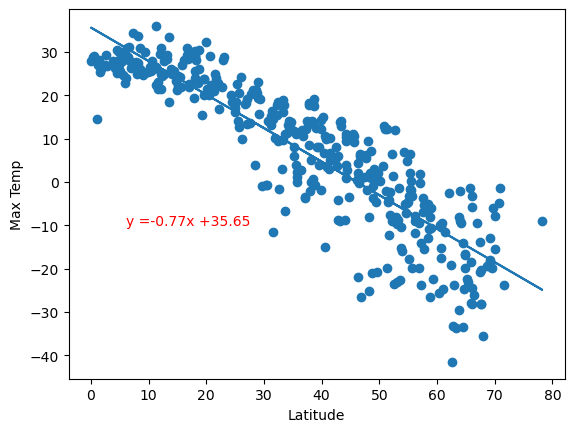

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (6, -10))


The r-value is: 0.25577901896225275


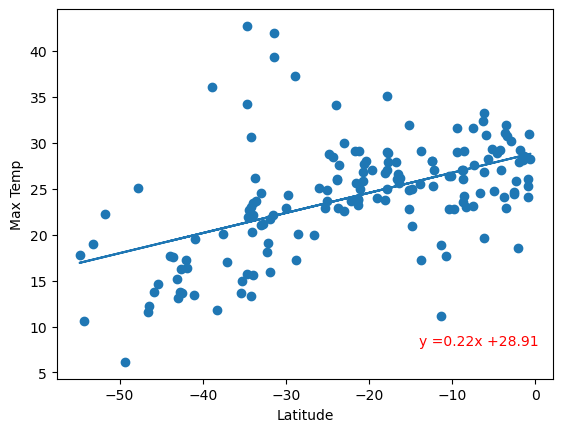

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (-14,8))


**Discussion about the linear relationship:** The temperature appears to linearly increase with increasing latitude on Southern Hemisphere and r value = 0.25, suggests a positive linear relationship. The opposite is true for Northern Hemisphere, in which there is a strong negative linear relationship. This suggests that the higher the latitude on Northern Hemisphere, the colder the area becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22317413208872866


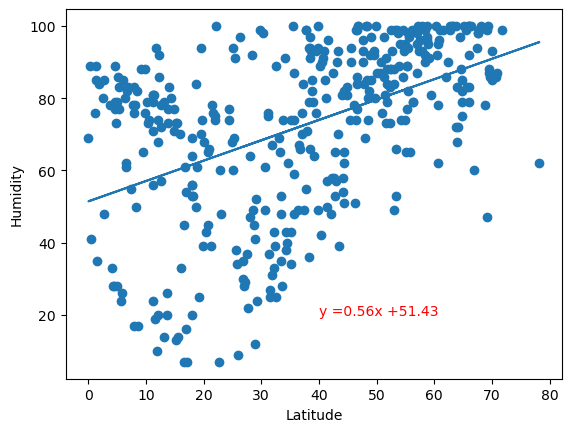

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Humidity", (40, 20))

The r-value is: 0.04643520063405883


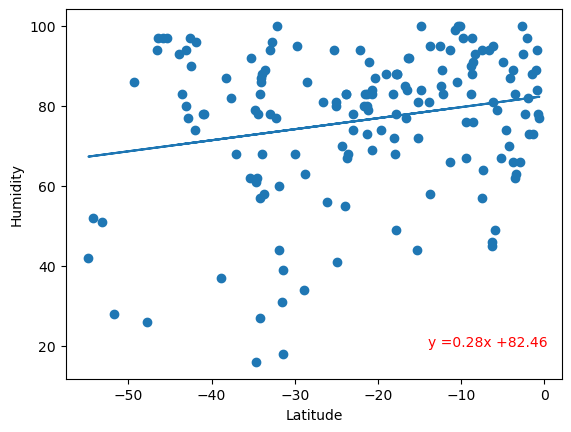

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Humidity", (-14,20))

**Discussion about the linear relationship: Comparing linear relationships between latitude and humidity of Northern to Southern Hemispheres, it is clear that there is less humidity in colder areas than at lower latitudes. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15917945946272163


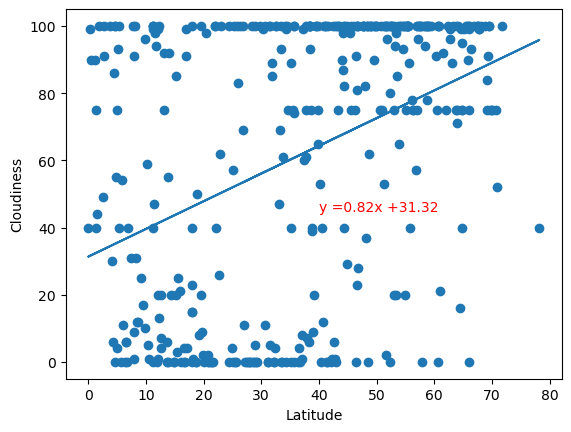

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness", (40, 45))

The r-value is: 0.037419646274055945


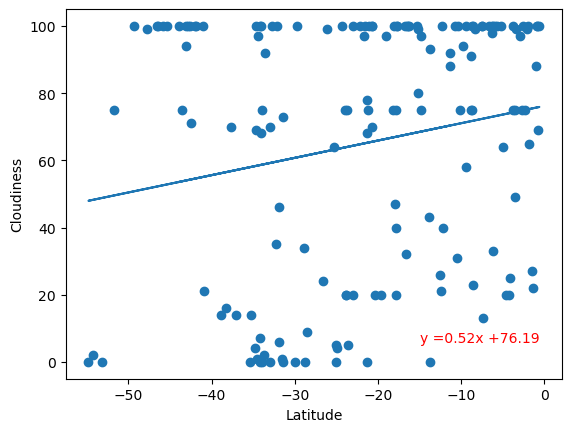

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness", (-15, 6))

**Discussion about the linear relationship: It is clear that cloudiness increases as latitude increases on both Southern and Northern Hemispheres. At latitutes above 60, the cloud cover is around 80%.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0019510984682947201


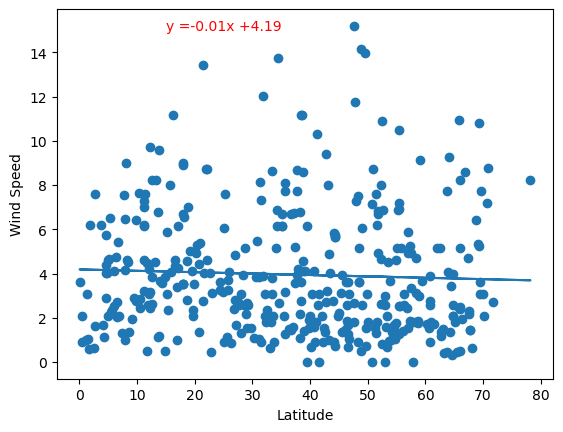

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed", (15,15))

The r-value is: 0.03609813409551257


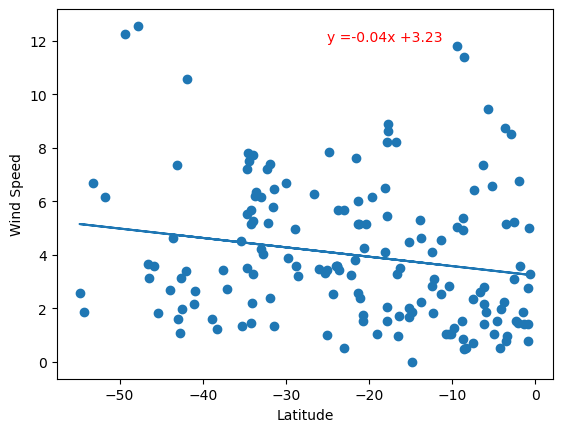

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed", (-25, 12))

**Discussion about the linear relationship: It is clear that the wind speed remains fairly consistent with increasing latitude. Thus, regions near the equator experience winds at a lower speed. 